# Homework 3 Fitting ODEs!

**You must work alone as much as possible on this assignment.** You are welcome to ask colleagues for help with a bug in your code, but this should be for very minor issues. 





# Problem 1: Analysis of a simple chemostat


Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth{(say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

We use the following equations and info to describe the chemostat dynamics:

Let: 
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/l$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/l.
- V be the volume of the chemost stat and equal to 1$l$.
- Q be the fixed volumetric flow rate and equal to 1 $l/h$.
- q = Q/V be the dilution rate ($h^{-1}$)

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

However, we have several **unknown parameters that we need to estimate**:

- r is the growth rate of bacteria ($h^{-1}$) defined as $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$, but $K_m$ and $R_{max}$ are unknown. 
- y is the yield parameter and is also unknown. 

So we went to the lab and **collected training data (see csv file).**



# In the space below, plot the training data versus time. 
    - Label all axes and data sets. Unclear figures will lose points.
    

    time     N     c
0    0.0  4.12  0.49
1    1.0  2.45  2.88
2    2.0  2.00  3.66
3    3.0  1.76  3.86
4    4.0  1.82  3.89
5    5.0  1.68  4.40
6    6.0  1.72  4.20
7    7.0  1.58  4.56
8    8.0  1.57  4.13
9    9.0  1.56  4.48
10  10.0  1.63  4.50
11  11.0  1.60  4.15
12  12.0  1.35  4.34
13  13.0  1.46  4.49
14  14.0  1.47  4.51
15  15.0  1.46  4.47
16  16.0  1.53  4.55
17  17.0  1.37  4.21
18  18.0  1.53  4.52
19  19.0  1.60  4.16


<AxesSubplot:xlabel='time [h]', ylabel='Concentration of nutrients [g/L]'>

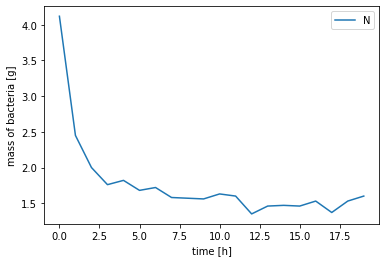

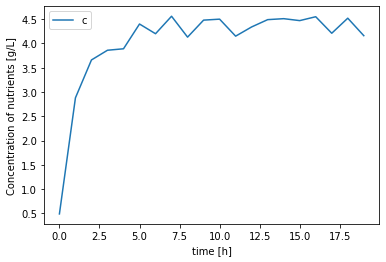

In [176]:
import pandas as pd

#lets teach a computer to read
dat = pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\Homework 3 training data.csv")

#what does the data look like
print(dat)
#ok now I know

#ok lets plot
dat.plot("time", "N", xlabel = "time [h]", ylabel = "mass of bacteria [g]")
dat.plot("time", "c", xlabel = "time [h]", ylabel = "Concentration of nutrients [g/L]")

# Below, write the functions needed to define the RMSE.

- Be sure to test some values to ensure it runs.


In [177]:
import numpy as np
from scipy.integrate import odeint

#establish time values, initial conditions, and known parameters
tvalues = np.arange(0, 20, 1)
ic = (4, 0.5)
c0 = 8
q = 1
ac = (1, 1, 1)

#ODE system definition
def sys(x, t, y, Rmax, Km):
    N, c = x
    dN = ((Rmax*c)/(Km+c))*N-q*N
    dc = q*c0-q*c-(((Rmax*c)/(Km+c))*N)/y
    return(dN, dc)

#testing value
#print(sys(ic, tvalues, 1, 1, 1))

#training data
trainingdata = odeint(sys, ic, tvalues, args=ac)

# Use minimize to estimate parameters.
- Test the accuracy of the fit by plotting, on one figure, the data for N and c and the fitted ODE's N and c responses.
    - Clearly label the data and fitted trajectories.
- If the figure shows that the fit is not good or if minimize fails to converge, try a new initial guess.
- Once your have your best answer, **go to our Canvas Quizzes** and submit your estimates. The quiz will  let you know if you're correct or not ;)
    - You can submit up to 5 guesses.
    - You must keep the **code that generates each guess**. You can create extra code cells as needed.
    - You will not lose points for wrong guesses. Do not resubmit the same numbers over and over. Try adjusting initial guesses to identify new possible solutions.

      fun: 0.6023754711097611
 hess_inv: array([[0.1286921 , 0.40385641, 0.84974862],
       [0.40385641, 1.28725459, 2.70293505],
       [0.84974862, 2.70293505, 5.6770645 ]])
      jac: array([ 1.27926469e-05, -2.71946192e-06,  8.19563866e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 292
      nit: 23
     njev: 70
   status: 2
  success: False
        x: array([ 0.42586983,  5.18042026, 18.35664018])


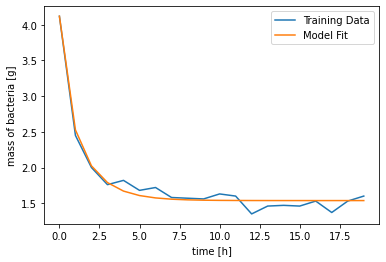

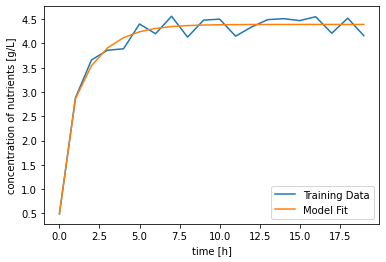

<Figure size 432x288 with 0 Axes>

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import odeint

#lets teach a computer to read
dat = pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\Homework 3 training data.csv")

#what does the data look like
#print(dat)
#ok now I know

#ok lets plot
dat.plot("time", "N", xlabel = "time [h]", ylabel = "mass of bacteria [g]")
dat.plot("time", "c", xlabel = "time [h]", ylabel = "Concentration of nutrients [g/L]")
#establish time values, initial conditions, and known parameters
tvalues = np.arange(0, 20, 1)
ic = (4.12, 0.49)
c0 = 8
q = 1
ac = (.43, 3, 8.5)

#ODE system definition
def sys(x, t, y, Rmax, Km):
    N, c = x
    dN = ((Rmax*c)/(Km+c))*N-q*N
    dc = q*c0-q*c-(((Rmax*c)/(Km+c))*N)/y
    return(dN, dc)

#make data to fit to
trainingdataN = dat.iloc[:,1].values
trainingdatac = dat.iloc[:,2].values
#print(trainingdataN)

#error values
def error(params):
    y, Rmax, Km = params
    ODEoutput = odeint(sys, ic, tvalues, args=(y, Rmax, Km))
    err = (trainingdataN - ODEoutput[:,0])**2+(trainingdatac - ODEoutput[:,1])**2
    #print(err)
    return np.sum(err)
    
#minimizing error function
sol = minimize(error, x0 = ac)
print(sol)
fitdata = odeint(sys, ic, tvalues, args=(sol.x[0], sol.x[1], sol.x[2]))
fd = {"N": fitdata[:,0], "c": fitdata[:,1]}
fdat = pd.DataFrame(data=fd)

#print(fitdata)

plt.clf()
ax1 = plt.gca()
plt.figure(0)
dat.plot(x =  "time", y = ["N"], xlabel = "time [h]", ylabel = "mass of bacteria [g]", ax = ax1)
fdat.plot(y = ["N"], ax = ax1)
ax1.legend(['Training Data', 'Model Fit'])
plt.clf()

ax2 = plt.gca()
plt.figure(1)
dat.plot(x =  "time", y = ["c"], xlabel = "time [h]", ylabel = "concentration of nutrients [g/L]", ax = ax2)
fdat.plot(y = ["c"], ax = ax2)
ax2.legend(['Training Data', 'Model Fit'])
plt.clf()


parameters attempt 1: ac = [0.43, 5.19, 18.4] Result: y = 0.43 is correct

parameters attempt 2: ac = [0.43, 5.18, 18.3] Result: y = 0.43 is correct

parameters attempt 3: ac = [0.43, 5.19, 18.4] (correctly labelled Rmax and Km) Result: y = 0.43 is correct

parameters attempt 4: ac = [0.43, 115, 497] result y = 0.43 is correct

parameters attempt 5: ac = [0.43, 11403, 49720] result y = 0.43 is correct
